In [1]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [6]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [7]:
!pip install pyqt5 lxml 
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

### Load Custom Model

In [2]:
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
!cd yolov5 && python train.py --img 640 --batch 35 --epoch 100 --data dataset.yml --weights yolov5s.pt --workers 2 

In [11]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp8/weights/last.pt')

Using cache found in C:\Users\IKHWAN/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-21 Python-3.9.18 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [12]:
img = 'data//val//121.jpg' 
results = model(img)
results.print()

image 1/1: 1800x4000 1 robot
Speed: 95.5ms pre-process, 60.3ms inference, 0.0ms NMS per image at shape (1, 3, 288, 640)


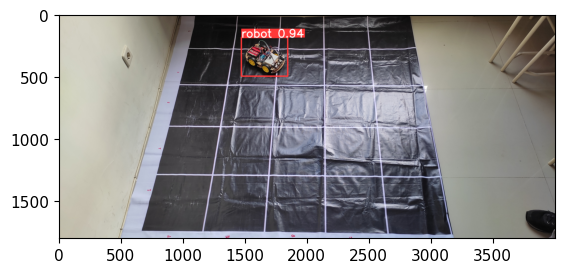

In [13]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [14]:
cap = cv2.VideoCapture('E://jupyternotebook//modelforobot//robot3.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    frame = cv2.resize(frame, (1520,900), fx=0, fy=0, interpolation=cv2.INTER_AREA)
    results = model(frame)
    fps = cap.get(cv2.CAP_PROP_FPS)
    #print(fps)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [15]:
!python yolov5/detect.py --weights yolov5/runs/train/exp8/weights/last.pt --img 1080 --conf 0.35 --source ../robot3.mp4

detect: weights=['yolov5/runs/train/exp8/weights/last.pt'], source=../robot3.mp4, data=yolov5\data\coco128.yaml, imgsz=[1080, 1080], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-238-gd5d514e Python-3.9.18 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING  --img-size [1080, 1080] must be multiple of max stride 32, updating to [1088, 1088]
video 1/1 (1/3637) E:\jupyternotebook\modelforobot\robot3.mp4: 640x1088 1 robot, 79.7ms
video 1/1 (2/3637) E:\jupyternotebook\modelforobot\robot3.mp4: 640x1088 1 robot, 10.0ms
video 1/1 (3/3637) E

In [23]:
import os
import time
import cv2

def displayGrid(frame):
    # Add a 3×3 Grid
    cv2.line(frame, (int(camera_Width/2)–centerZone, 0)     , (int(camera_Width/2)–centerZone, camera_Heigth)    , lineColor, lineThickness)
    cv2.line(frame, (int(camera_Width/2)+centerZone, 0)     , (int(camera_Width/2)+centerZone, camera_Heigth)    , lineColor, lineThickness)
    cv2.line(frame, (0, int(camera_Heigth / 2) – centerZone), (camera_Width, int(camera_Heigth / 2) – centerZone), lineColor, lineThickness)
    cv2.line(frame, (0, int(camera_Heigth / 2) + centerZone), (camera_Width, int(camera_Heigth / 2) + centerZone), lineColor, lineThickness)

def calculatePositionForDetectedFace(frame, x, y, h , w):
    # calculate direction and relative position of the face
    cx = int(x + (w / 2))  # Center X of the Face
    cy = int(y + (h / 2))  # Center Y of the Face

    if (cx <int(camera_Width/2) – centerZone):
        cv2.putText  (frame, " LEFT " , (20, 50), cv2.FONT_HERSHEY_COMPLEX, 1 , colorGreen, 2)
        dir = 1
    elif (cx > int(camera_Width / 2) + centerZone):
        cv2.putText(frame, " RIGHT ", (20, 50), cv2.FONT_HERSHEY_COMPLEX,1,colorGreen, 3)
        dir = 2
    elif (cy < int(camera_Heigth / 2) – centerZone):
        cv2.putText(frame, " UP ", (20, 50), cv2.FONT_HERSHEY_COMPLEX,1,colorGreen, 3)
        dir = 3
    elif (cy > int(camera_Heigth / 2) + centerZone):
        cv2.putText(frame, " DOWN ", (20, 50), cv2.FONT_HERSHEY_COMPLEX, 1,colorGreen, 3)
        dir = 4
    else: dir=0

    # display detected face frame, line from center and direction to go
    cv2.line     (frame, (int(camera_Width/2),int(camera_Heigth/2)), (cx,cy), colorRed, messageThickness)
    cv2.rectangle(frame, (x, y), (x + w, y + h), colorBlue, messageThickness)
    cv2.putText  (frame, str(int(x)) + " " + str(int(y)), (x – 20, y – 45), cv2.FONT_HERSHEY_COMPLEX,0.7, colorRed, messageThickness)

# Camera Settings
camera_Width  = 1024 # 1280 # 640
camera_Heigth = 780  # 960  # 480
centerZone    = 100

# GridLine color green and thickness
lineColor = (0, 255, 0) 
lineThickness = 2

# message color and thickness
colorBlue = (255, 0, 0) 
colorGreen = (0, 255, 0) 
colorRed = (0, 0, 255) #red
messageThickness = 2

dsize = (camera_Width, camera_Heigth)

video_capture = cv2.VideoCapture(1)
time.sleep(2.0)

# enable face and smile detection
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

i = 0
while True:
    i = i + 1 
    ret, frameOrig = video_capture.read()
    frame = cv2.resize(frameOrig, dsize)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    displayGrid(frame)

    # detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces: 
        # display face in grid
        calculatePositionForDetectedFace(frame, x, y, h , w)

    cv2.imshow('@ElBruno – Follow Faces', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

SyntaxError: invalid character '–' (U+2013) (3748356861.py, line 7)